In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix_bak_2015 = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   studium_id              3936 non-null   int64  
 1   pohlavi_kod             3936 non-null   int64  
 2   je_cech                 3936 non-null   int64  
 3   datum_zahajeni          3936 non-null   int64  
 4   rok_maturity            3936 non-null   int64  
 5   maturita_nastup_rozdil  3936 non-null   int64  
 6   gymnazium               3936 non-null   int64  
 7   praha                   3936 non-null   int64  
 8   scio                    3936 non-null   int64  
 9   olym                    3936 non-null   int64  
 10  zkouska                 3936 non-null   int64  
 11  prominuti               3936 non-null   int64  
 12  dostudoval_uspesne      3936 non-null   int64  
 13  BI-PA1                  3866 non-null   float64
 14  BI-PAI                  3867 non-null   

In [4]:
matrix_bak_2015.mean()

studium_id                1.450497e+07
pohlavi_kod               1.257622e-01
je_cech                   7.731199e-01
datum_zahajeni            2.017119e+03
rok_maturity              2.016279e+03
maturita_nastup_rozdil    8.394309e-01
gymnazium                 5.406504e-01
praha                     5.005081e-02
scio                      7.190041e-02
olym                      7.545732e-02
zkouska                   2.870935e-02
prominuti                 0.000000e+00
dostudoval_uspesne        2.113821e-01
BI-PA1                    3.204346e+00
BI-PAI                    2.759633e+00
BI-CAO                    2.005299e+00
BI-PS1                    3.077132e+00
BI-MLO                    3.005428e+00
BI-ZMA                    3.219130e+00
BI-PA2                    2.979326e+00
BI-DBS                    2.557846e+00
BI-SAP                    2.467303e+00
BI-LIN                    3.258693e+00
BI-AG1                    2.848361e+00
BI-AAG                    2.813123e+00
BI-ZDM                   

## Příprava datasetu

### Nastavení indexu

In [5]:
matrix_bak_2015 = matrix_bak_2015.set_index(['studium_id'])

### Odstranění příznaků

In [6]:
matrix_bak_2015 = matrix_bak_2015.drop(columns=['BI-DPR', 'pohlavi_kod', 'je_cech', 
                                                'prominuti', 'zkouska', 'olym', 
                                               'scio', 'praha', 'gymnazium'])

### Přidání příznaků

In [7]:
matrix_bak_2015['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].mean(axis=1)

In [8]:
matrix_bak_2015.mean()

datum_zahajeni            2017.118648
rok_maturity              2016.279217
maturita_nastup_rozdil       0.839431
dostudoval_uspesne           0.211382
BI-PA1                       3.204346
BI-PAI                       2.759633
BI-CAO                       2.005299
BI-PS1                       3.077132
BI-MLO                       3.005428
BI-ZMA                       3.219130
BI-PA2                       2.979326
BI-DBS                       2.557846
BI-SAP                       2.467303
BI-LIN                       3.258693
BI-AG1                       2.848361
BI-AAG                       2.813123
BI-ZDM                       2.907979
BI-OSY                       2.721917
BI-PSI                       2.631344
BI-BEZ                       2.526510
BI-PST                       2.378175
BI-SI1.2                     2.217652
BI-EMP                       1.822159
prumer                       3.061914
dtype: float64

### Doplnění NaN hodnot

##### Doplnění pomocí KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
matrix_bak_2015 = pd.DataFrame(imputer.fit_transform(matrix_bak_2015), index=matrix_bak_2015.index, columns=matrix_bak_2015.columns)

In [10]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datum_zahajeni          3936 non-null   float64
 1   rok_maturity            3936 non-null   float64
 2   maturita_nastup_rozdil  3936 non-null   float64
 3   dostudoval_uspesne      3936 non-null   float64
 4   BI-PA1                  3936 non-null   float64
 5   BI-PAI                  3936 non-null   float64
 6   BI-CAO                  3936 non-null   float64
 7   BI-PS1                  3936 non-null   float64
 8   BI-MLO                  3936 non-null   float64
 9   BI-ZMA                  3936 non-null   float64
 10  BI-PA2                  3936 non-null   float64
 11  BI-DBS                  3936 non-null   float64
 12  BI-SAP                  3936 non-null   float64
 13  BI-LIN                  3936 non-null   float64
 14  BI-AG1                  3936 

#### Zaokrouhlení doplněných hodnot

In [11]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [12]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [13]:
matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].applymap(custom_round)

In [14]:
matrix_bak_2015

datum_zahajeni  rok_maturity  maturita_nastup_rozdil  \
studium_id                                                         
12375406            2015.0        2009.0                     6.0   
11736906            2015.0        2009.0                     6.0   
12032306            2015.0        2007.0                     8.0   
15613006            2018.0        2009.0                     9.0   
12948006            2016.0        2010.0                     6.0   
11703806            2015.0        2010.0                     5.0   
12967806            2016.0        2010.0                     6.0   
11738606            2015.0        2010.0                     5.0   
11719706            2015.0        2010.0                     5.0   
11675306            2015.0        2010.0                     5.0   
12987806            2016.0        2010.0                     6.0   
11743906            2015.0        2010.0                     5.0   
13016006            2016.0        2010.0                     6.0   
12036006            2015.0        2010.0                     5.0   
13512306            2016.0        2011.0                     5.0   
12987706            2016.0        2010.0                     6.0   
11678106            2015.0        2010.0                     5.0   
13518506            2016.0        2011.0                     5.0   
14256606            2017.0        2011.0                     6.0   
11727206            2015.0        2011.0                     4.0   
11736306            2015.0        2011.0                     4.0   
12967906            2016.0        2011.0                     5.0   
11703506            2015.0        2011.0                     4.0   
13010106            2016.0        2011.0                     5.0   
14800306            2017.0        2011.0                     6.0   
11744706            2015.0        2011.0                     4.0   
11696406            2015.0        2010.0                     5.0   
12973406            2016.0        2011.0                     5.0   
11737806            2015.0        2011.0                     4.0   
12035506            2015.0        2011.0                     4.0   
13512006            2016.0        2011.0                     5.0   
12964406            2016.0        2011.0                     5.0   
12994106            2016.0        2011.0                     5.0   
11742506            2015.0        2011.0                     4.0   
11712706            2015.0        2011.0                     4.0   
13518806            2016.0        2011.0                     5.0   
11735606            2015.0        2011.0                     4.0   
13518606            2016.0        2011.0                     5.0   
15586306            2018.0        2011.0                     7.0   
13519806            2016.0        2011.0                     5.0   
11686106            2015.0        2012.0                     3.0   
11692606            2015.0        2012.0                     3.0   
13013306            2016.0        2012.0                     4.0   
11713906            2015.0        2012.0                     3.0   
12978506            2016.0        2012.0                     4.0   
14283706            2017.0        2012.0                     5.0   
11736706            2015.0        2012.0                     3.0   
11676006            2015.0        2012.0                     3.0   
12033706            2015.0        2012.0                     3.0   
12964506            2016.0        2012.0                     4.0   
16724706            2019.0        2012.0                     7.0   
12954706            2016.0        2012.0                     4.0   
12034706            2015.0        2012.0                     3.0   
12959206            2016.0        2012.0                     4.0   
14803806            2017.0        2012.0                     5.0   
11733706            2015.0        2012.0                     3.0   
11707706            2015.0        2012.0                     3.0   


### Pomocné promenné

In [15]:
# predmety podle doporuceneho semestru
courses_1 = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA']
courses_2 = ['BI-PA2', 'BI-DBS', 'BI-SAP', 'BI-LIN']
courses_3 = ['BI-AAG', 'BI-ZDM', 'BI-AG1']
courses_4 = ['BI-OSY', 'BI-PSI', 'BI-BEZ']
courses_5 = ['BI-PST']
courses_6 = []
courses_7 = ['BI-SI1.2', 'BI-EMP']

courses = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7

In [16]:
means = {'BI-PA1':3, 'BI-PAI':3, 'BI-CAO':2, 'BI-PS1':3, 'BI-MLO':3, 'BI-ZMA':3,
        'BI-PA2':3, 'BI-DBS':2.5, 'BI-SAP':2.5, 'BI-LIN':3,
        'BI-AAG':3, 'BI-ZDM':3, 'BI-AG1':3,
        'BI-OSY':2.5, 'BI-PSI':2.5, 'BI-BEZ':2.5,
        'BI-PST':2,
        'BI-SI1.2':2, 'BI-EMP':2
        }

prumer_mean = 3

### Nastavení atributů na kategorické - ordinální

In [17]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4, 0], ordered=True)
# BI-PA1
matrix_bak_2015['BI-PA1'] = matrix_bak_2015['BI-PA1'].astype(grades_category)
# BI-PAI
matrix_bak_2015['BI-PAI'] = matrix_bak_2015['BI-PAI'].astype(grades_category)
# BI-CAO
matrix_bak_2015['BI-CAO'] = matrix_bak_2015['BI-CAO'].astype(grades_category)
# BI-PS1
matrix_bak_2015['BI-PS1'] = matrix_bak_2015['BI-PS1'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-MLO'] = matrix_bak_2015['BI-MLO'].astype(grades_category)
# BI-ZMA
matrix_bak_2015['BI-ZMA'] = matrix_bak_2015['BI-ZMA'].astype(grades_category)
# BI-PA2
matrix_bak_2015['BI-PA2'] = matrix_bak_2015['BI-PA2'].astype(grades_category)
# BI-DBS
matrix_bak_2015['BI-DBS'] = matrix_bak_2015['BI-DBS'].astype(grades_category)
# BI-SAP
matrix_bak_2015['BI-SAP'] = matrix_bak_2015['BI-SAP'].astype(grades_category)
# BI-LIN
matrix_bak_2015['BI-LIN'] = matrix_bak_2015['BI-LIN'].astype(grades_category)
# BI-AG1
matrix_bak_2015['BI-AG1'] = matrix_bak_2015['BI-AG1'].astype(grades_category)
# BI-AAG
matrix_bak_2015['BI-AAG'] = matrix_bak_2015['BI-AAG'].astype(grades_category)
# BI-ZDM
matrix_bak_2015['BI-ZDM'] = matrix_bak_2015['BI-ZDM'].astype(grades_category)
# BI-OSY
matrix_bak_2015['BI-OSY'] = matrix_bak_2015['BI-OSY'].astype(grades_category)
# BI-PSI
matrix_bak_2015['BI-PSI'] = matrix_bak_2015['BI-PSI'].astype(grades_category)
# BI-BEZ
matrix_bak_2015['BI-BEZ'] = matrix_bak_2015['BI-BEZ'].astype(grades_category)
# BI-PST
matrix_bak_2015['BI-PST'] = matrix_bak_2015['BI-PST'].astype(grades_category)
# BI-SI1.2
matrix_bak_2015['BI-SI1.2'] = matrix_bak_2015['BI-SI1.2'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-EMP'] = matrix_bak_2015['BI-EMP'].astype(grades_category)

In [18]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 12375406 to 11740806
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   datum_zahajeni          3936 non-null   float64 
 1   rok_maturity            3936 non-null   float64 
 2   maturita_nastup_rozdil  3936 non-null   float64 
 3   dostudoval_uspesne      3936 non-null   float64 
 4   BI-PA1                  3936 non-null   category
 5   BI-PAI                  3936 non-null   category
 6   BI-CAO                  3936 non-null   category
 7   BI-PS1                  3936 non-null   category
 8   BI-MLO                  3936 non-null   category
 9   BI-ZMA                  3936 non-null   category
 10  BI-PA2                  3936 non-null   category
 11  BI-DBS                  3936 non-null   category
 12  BI-SAP                  3936 non-null   category
 13  BI-LIN                  3936 non-null   category
 14  BI-AG1       

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [19]:
Xdata = matrix_bak_2015.drop(columns='dostudoval_uspesne')
ydata = matrix_bak_2015.dostudoval_uspesne

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(3936, 23)

(3936,)

trénovací data


(3148, 23)

(3148,)

testovací data


(788, 23)

(788,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [21]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [22]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [23]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}

0.896206 (+/-0.029561) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.922117 (+/-0.034583) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.944259 (+/-0.028784) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.942075 (+/-0.024682) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.935055 (+/-0.045397) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.903051 (+/-0.030093) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.931685 (+/-0.029467) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.945153 (+/-0.030091) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.949181 (+/-0.028935) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.944347 (+/-0.046215) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [24]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.979987
accuracy score (test): 0.977157


In [25]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
22                  prumer            0.774576
15                  BI-ZDM            0.073520
16                  BI-OSY            0.062875
13                  BI-AG1            0.032814
19                  BI-PST            0.027439
12                  BI-LIN            0.011787
2   maturita_nastup_rozdil            0.009235
21                  BI-EMP            0.005790
14                  BI-AAG            0.001964
20                BI-SI1.2            0.000000
18                  BI-BEZ            0.000000
17                  BI-PSI            0.000000
0           datum_zahajeni            0.000000
1             rok_maturity            0.000000
10                  BI-DBS            0.000000
9                   BI-PA2            0.000000
8                   BI-ZMA            0.000000
7                   BI-MLO            0.000000
6                   BI-PS1            0.000000
5                   BI-CAO            0.000000
4                   BI-PAI            0.000000
3                   BI-PA1            0.000000
11                  BI-SAP            0.000000

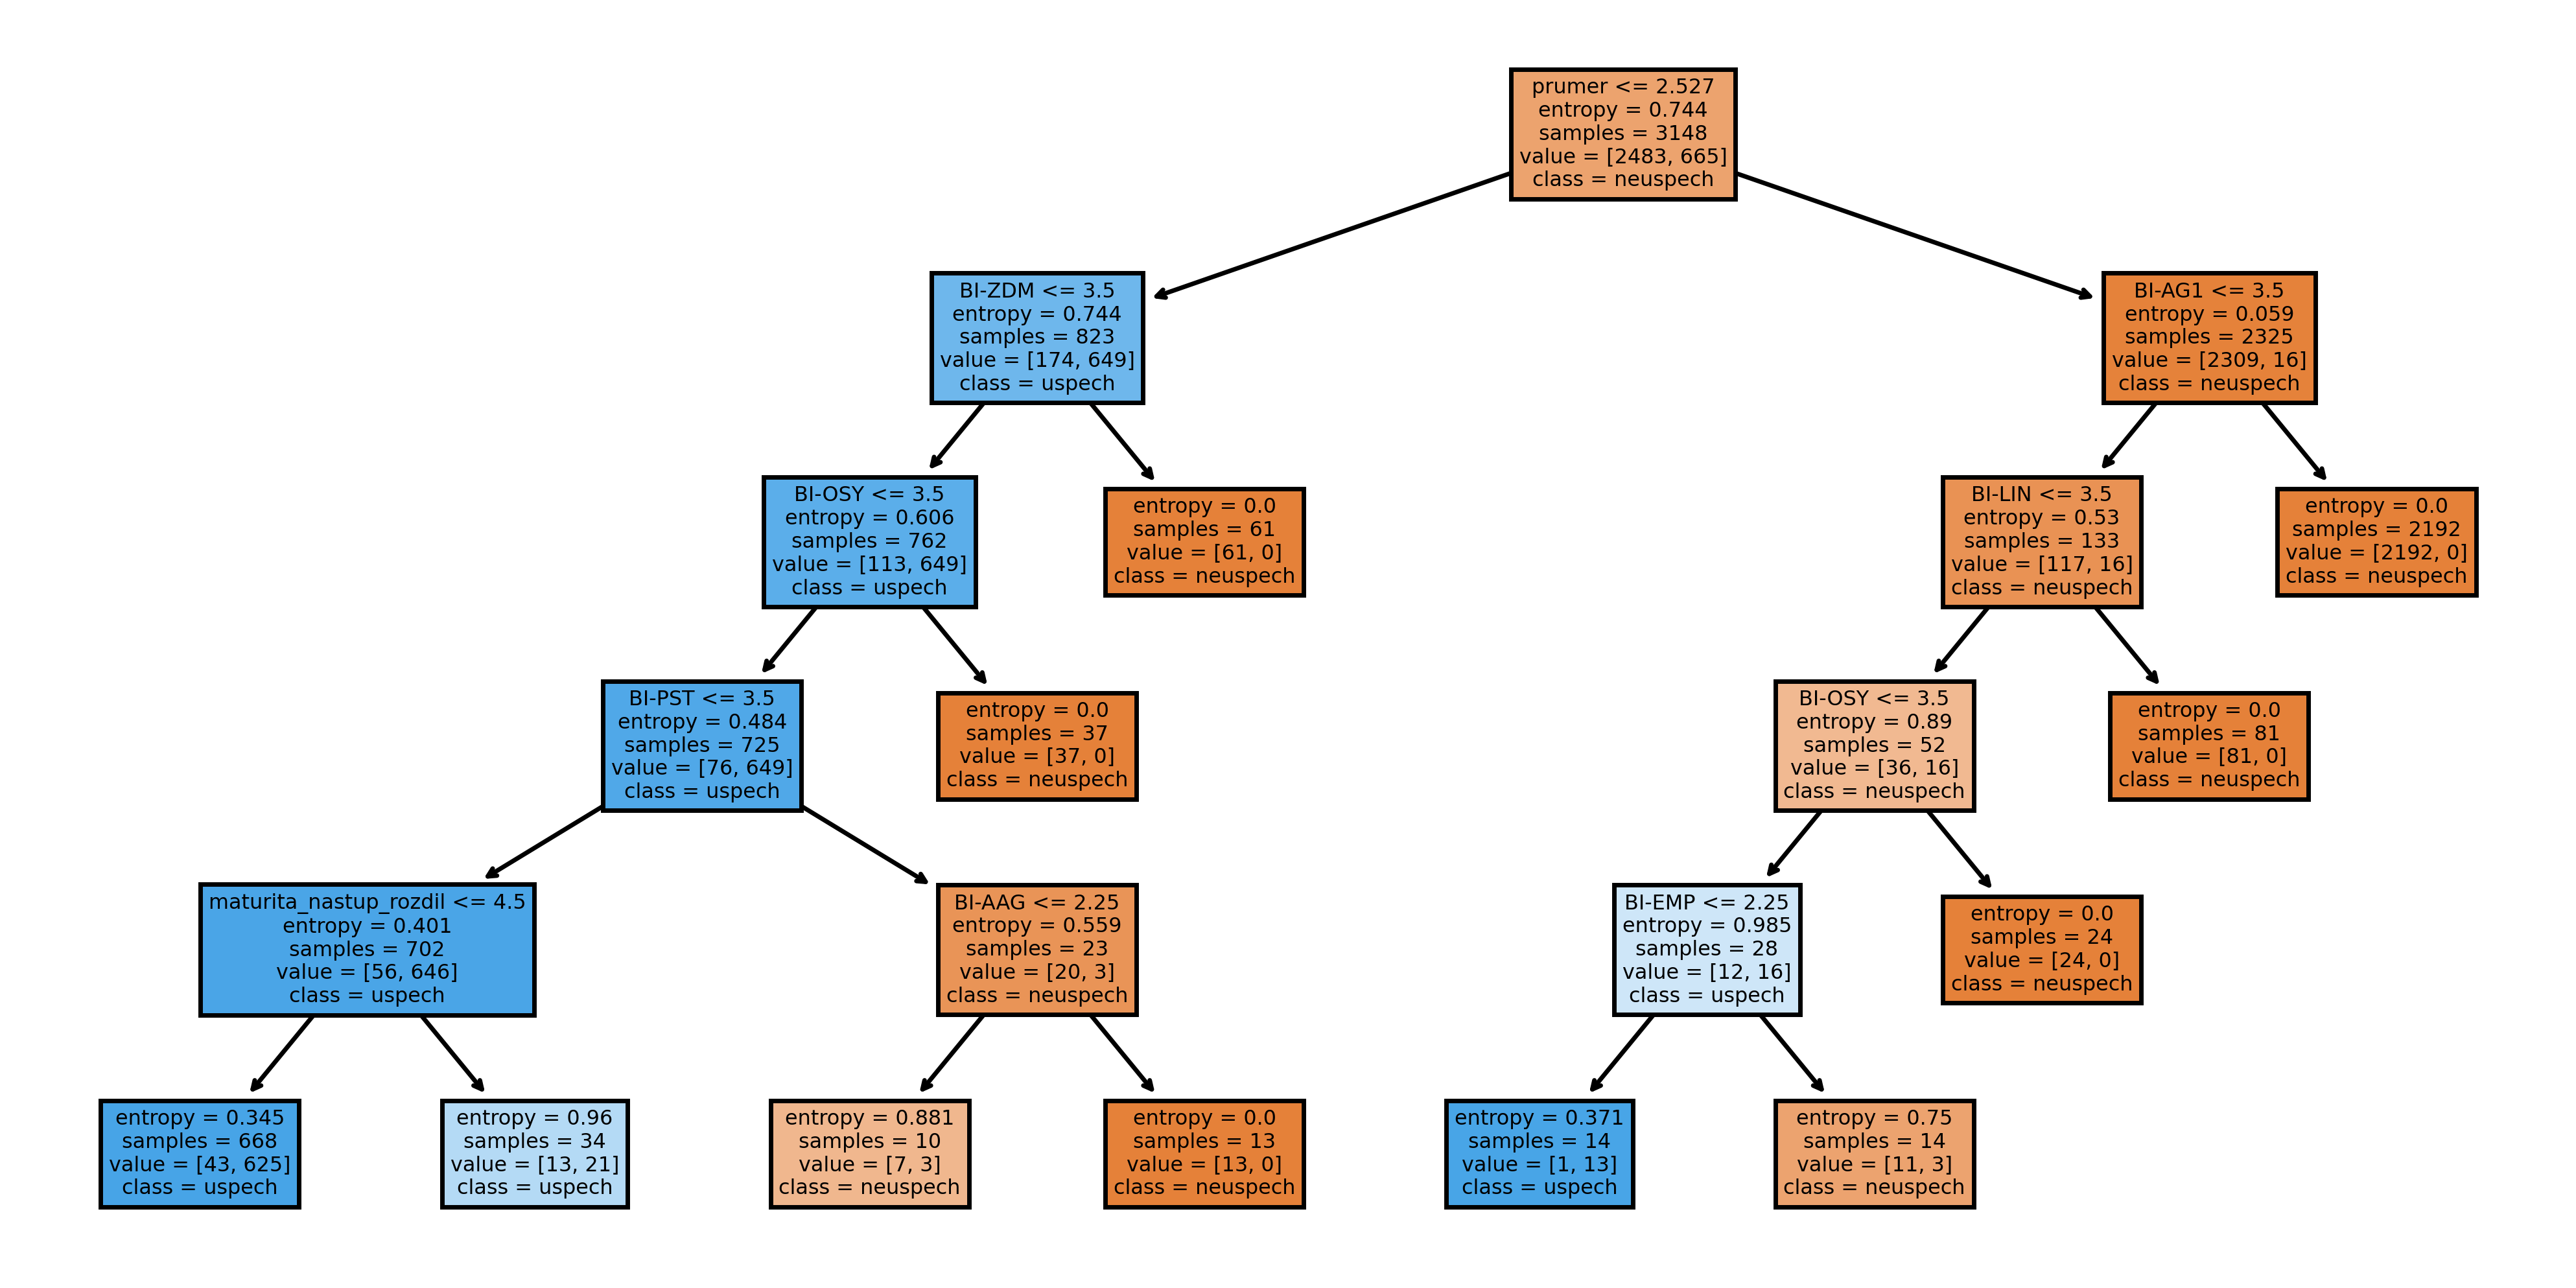

In [26]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
fig.savefig('tree_f1.png')

#### Random forest

In [27]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [28]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 35}

0.919730 (+/-0.023593) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.921527 (+/-0.029024) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.933433 (+/-0.018335) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.926892 (+/-0.027556) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.917274 (+/-0.035371) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.929924 (+/-0.027764) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.925670 (+/-0.018094) for {'criterion': 'gini', 'max_depth': 2, 

In [29]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.975540
accuracy score (test): 0.983503


In [30]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
12                  BI-LIN            0.189815
13                  BI-AG1            0.165946
14                  BI-AAG            0.151855
15                  BI-ZDM            0.116042
22                  prumer            0.085866
16                  BI-OSY            0.068479
8                   BI-ZMA            0.053180
18                  BI-BEZ            0.051033
19                  BI-PST            0.047690
9                   BI-PA2            0.026097
20                BI-SI1.2            0.014542
3                   BI-PA1            0.014492
17                  BI-PSI            0.012245
6                   BI-PS1            0.001300
1             rok_maturity            0.000757
0           datum_zahajeni            0.000455
10                  BI-DBS            0.000163
2   maturita_nastup_rozdil            0.000043
7                   BI-MLO            0.000000
5                   BI-CAO            0.000000
4                   BI-PAI            0.000000
21                  BI-EMP            0.000000
11                  BI-SAP            0.000000

#### SVM

In [31]:
param_grid_svm = {
    'kernel':['linear', 'rbf'],
    'gamma':['auto', 'scale'],
    'C':[100, 10, 1, 0.1]
}
param_comb_svm = ParameterGrid(param_grid_svm)

In [32]:
svc_f1 = get_best_parameters(param_grid_svm, SVC)

Best hyper-parameters are: 
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

0.929577 (+/-0.026091) for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.931905 (+/-0.027114) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.929577 (+/-0.026091) for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (+/-0.000000) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.926894 (+/-0.028028) for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.950041 (+/-0.023438) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.926894 (+/-0.028028) for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (+/-0.000000) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.927884 (+/-0.025773) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.950863 (+/-0.021058) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.927884 (+/-0.025773) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (+/-0.000000) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.932395 (+/-0.031734) for {'C': 0.1, 'gamma': 'auto

In [33]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, svc_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, svc_f1.predict(Xtest))))

accuracy score (train): 0.984752
accuracy score (test): 0.984772


#### Adaboost

In [34]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [35]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.7000000000000001, 'n_estimators': 45}

0.909781 (+/-0.053840) for {'learning_rate': 0.1, 'n_estimators': 5}
0.942125 (+/-0.018001) for {'learning_rate': 0.1, 'n_estimators': 10}
0.953683 (+/-0.016638) for {'learning_rate': 0.1, 'n_estimators': 15}
0.955214 (+/-0.017828) for {'learning_rate': 0.1, 'n_estimators': 20}
0.957910 (+/-0.016931) for {'learning_rate': 0.1, 'n_estimators': 25}
0.961445 (+/-0.021174) for {'learning_rate': 0.1, 'n_estimators': 30}
0.962826 (+/-0.020175) for {'learning_rate': 0.1, 'n_estimators': 35}
0.962826 (+/-0.020175) for {'learning_rate': 0.1, 'n_estimators': 40}
0.963586 (+/-0.021497) for {'learning_rate': 0.1, 'n_estimators': 45}
0.944260 (+/-0.029716) for {'learning_rate': 0.2, 'n_estimators': 5}
0.951919 (+/-0.027312) for {'learning_rate': 0.2, 'n_estimators': 10}
0.955528 (+/-0.021885) for {'learning_rate': 0.2, 'n_estimators': 15}
0.956771 (+/-0.020857) for {'learning_rate': 0.2, 'n_estimators': 20}
0.960

In [36]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.991105
accuracy score (test): 0.989848


In [37]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
19                  BI-PST            0.133333
2   maturita_nastup_rozdil            0.088889
22                  prumer            0.066667
9                   BI-PA2            0.066667
14                  BI-AAG            0.066667
12                  BI-LIN            0.044444
21                  BI-EMP            0.044444
18                  BI-BEZ            0.044444
17                  BI-PSI            0.044444
16                  BI-OSY            0.044444
15                  BI-ZDM            0.044444
11                  BI-SAP            0.044444
1             rok_maturity            0.044444
10                  BI-DBS            0.044444
5                   BI-CAO            0.044444
13                  BI-AG1            0.022222
8                   BI-ZMA            0.022222
7                   BI-MLO            0.022222
20                BI-SI1.2            0.022222
3                   BI-PA1            0.022222
0           datum_zahajeni            0.022222
6                   BI-PS1            0.000000
4                   BI-PAI            0.000000

#### Xgboost

In [38]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [39]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.1, 'max_depth': 7}

0.959950 (+/-0.020590) for {'eta': 0.1, 'max_depth': 3}
0.960640 (+/-0.018749) for {'eta': 0.1, 'max_depth': 4}
0.961340 (+/-0.014360) for {'eta': 0.1, 'max_depth': 5}
0.961178 (+/-0.019980) for {'eta': 0.1, 'max_depth': 6}
0.963378 (+/-0.011793) for {'eta': 0.1, 'max_depth': 7}
0.956298 (+/-0.018740) for {'eta': 0.2, 'max_depth': 3}
0.956268 (+/-0.020565) for {'eta': 0.2, 'max_depth': 4}
0.957639 (+/-0.018497) for {'eta': 0.2, 'max_depth': 5}
0.962043 (+/-0.018509) for {'eta': 0.2, 'max_depth': 6}
0.960496 (+/-0.013041) for {'eta': 0.2, 'max_depth': 7}
0.954882 (+/-0.022220) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.951050 (+/-0.020228) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.956899 (+/-0.016248) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.957615 (+/-0.018054) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.959071 (+/-0.016220) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.955650 (+/-0.023598)

In [40]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.998412
accuracy score XGBoost (val): 0.986041


In [41]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [42]:
feat_imp

prumer                    152.0
BI-PST                     98.0
BI-OSY                     90.0
BI-LIN                     89.0
BI-ZDM                     83.0
BI-PA1                     81.0
BI-AG1                     76.0
BI-AAG                     73.0
BI-DBS                     59.0
BI-PA2                     56.0
BI-SAP                     56.0
maturita_nastup_rozdil     55.0
datum_zahajeni             55.0
BI-ZMA                     52.0
BI-EMP                     43.0
BI-PS1                     39.0
rok_maturity               38.0
BI-PSI                     34.0
BI-SI1.2                   34.0
BI-BEZ                     29.0
BI-PAI                     29.0
BI-MLO                     28.0
BI-CAO                     20.0
dtype: float64

#### MLP

In [43]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [44]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.961881
accuracy score mlp (val): 0.974619


#### Lineární regrese

In [45]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [46]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.19009564671078918
RMSE reg (test): 0.17809457781846125


#### kNN

In [47]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [48]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

0.914345 (+/-0.026514) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.914345 (+/-0.026514) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.910951 (+/-0.009806) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.910951 (+/-0.009806) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.910827 (+/-0.036070) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.914214 (+/-0.025490) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.908016 (+/-0.023508) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.910814 (+/-0.006838) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.919791 (+/-0.025781) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.921046 (+/-0.023337) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.912113 (+/-0.018979) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.912113 (+/-0.018979) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.92

In [49]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.968869
accuracy score knn (val): 0.972081


## Testování po semestrech

### Doplnění 0

#### Pouze nepředmětové příznaky

In [50]:
Xtest_0 = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0.loc[:, course] = 0
Xtest_0.loc[:, 'prumer'] = 0

#### 1. semestr

In [51]:
Xtest_1 = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1.loc[:, course] = 0

courses_to_use = courses_1
Xtest_1.loc[:, 'prumer'] = Xtest_1.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První dva semestry

In [52]:
Xtest_2 = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2
Xtest_2.loc[:, 'prumer'] = Xtest_2.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První tři semestry

In [53]:
Xtest_3 = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2 + courses_3
Xtest_3.loc[:, 'prumer'] = Xtest_3.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První čtyři semestry 

In [54]:
Xtest_4 = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4
Xtest_4.loc[:, 'prumer'] = Xtest_4.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### Prvních pět semestrů

In [55]:
Xtest_5 = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4 + courses_5
Xtest_5.loc[:, 'prumer'] = Xtest_5.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### Všechny semestry bez SI1.2 a EMP

In [56]:
Xtest_6 = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6.loc[:, course] = 0
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6
Xtest_6.loc[:, 'prumer'] = Xtest_6.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

### Doplnění průměrem

#### Pouze nepředmětové příznaky

In [57]:
Xtest_0_mean = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0_mean.loc[:, course] = means[course]
    
Xtest_0_mean.loc[:, 'prumer'] = Xtest_0.loc[:, courses[0]:courses[-1]].mean(axis=1)

#### První semestr

In [58]:
Xtest_1_mean = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1_mean.loc[:, course] = means[course]

courses_to_use = courses_1
Xtest_1_mean['prumer'] = Xtest_1_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První dva semestry

In [59]:
Xtest_2_mean = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2
Xtest_2_mean['prumer'] = Xtest_2_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První tři semestry

In [60]:
Xtest_3_mean = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2 + courses_3
Xtest_3_mean['prumer'] = Xtest_3_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### První čtyři semestry 

In [61]:
Xtest_4_mean = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4
Xtest_4_mean['prumer'] = Xtest_4_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### Prvních pět semestrů

In [62]:
Xtest_5_mean = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4 + courses_5
Xtest_5_mean['prumer'] = Xtest_5_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

#### Všechny semestry bez SI1.2 a EMP

In [63]:
Xtest_6_mean = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6_mean.loc[:, course] = means[course]
    
courses_to_use = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6
Xtest_6_mean['prumer'] = Xtest_6_mean.loc[:, courses_to_use[0]:courses_to_use[-1]].mean(axis=1)

## Výsledky

In [64]:
results = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

results_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

In [65]:
results_reg = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_reg_mean = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])

### Linearní regrese měřena pomocí RMSE

#### Doplněno 0

In [66]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):   
    results_reg.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test[i]), np.array(ytest))), 3)

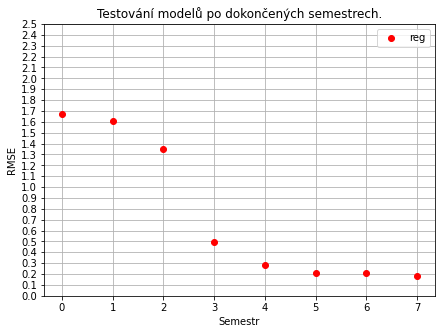

In [67]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg['reg'].index
yreg = results_reg['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.plot(xreg, yreg, 'o', color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [68]:
results_reg

reg
0  1.668
1  1.612
2  1.349
3  0.493
4  0.279
5  0.207
6  0.207
7  0.178

#### Doplněno průměrem

In [69]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_reg_mean.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test_mean[i]), np.array(ytest))), 3)

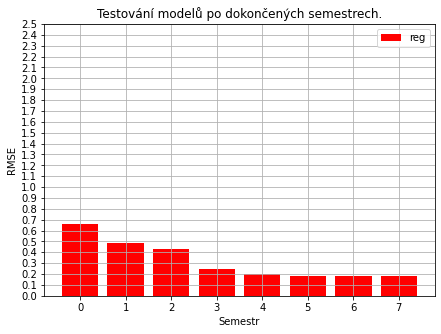

In [70]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg_mean['reg'].index
yreg = results_reg_mean['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.bar(xreg, yreg, color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [71]:
results_reg_mean

reg
0   0.66
1  0.489
2   0.43
3  0.243
4  0.197
5  0.184
6  0.184
7  0.178

## Ostatní modely
### Měřeno accuracy_score

In [72]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test[i])), 3)
    results.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test[i])), 3)
    results.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test[i])), 3)
    results.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test[i])), 3)
    results.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test[i])), 3)
    results.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test[i])), 3)

In [73]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test_mean[i])), 3)

#### Po doplnění 0

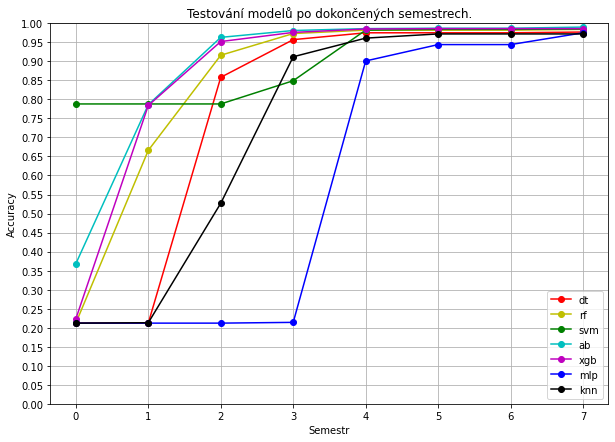

In [74]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results['dt'].index
ydt = results['dt'].values

xrf = results['rf'].index
yrf = results['rf'].values

xsvm = results['svm'].index
ysvm = results['svm'].values

xab = results['ab'].index
yab = results['ab'].values

xxgb = results['xgb'].index
yxgb = results['xgb'].values

xmlp = results['mlp'].index
ymlp = results['mlp'].values

xknn = results['knn'].index
yknn = results['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

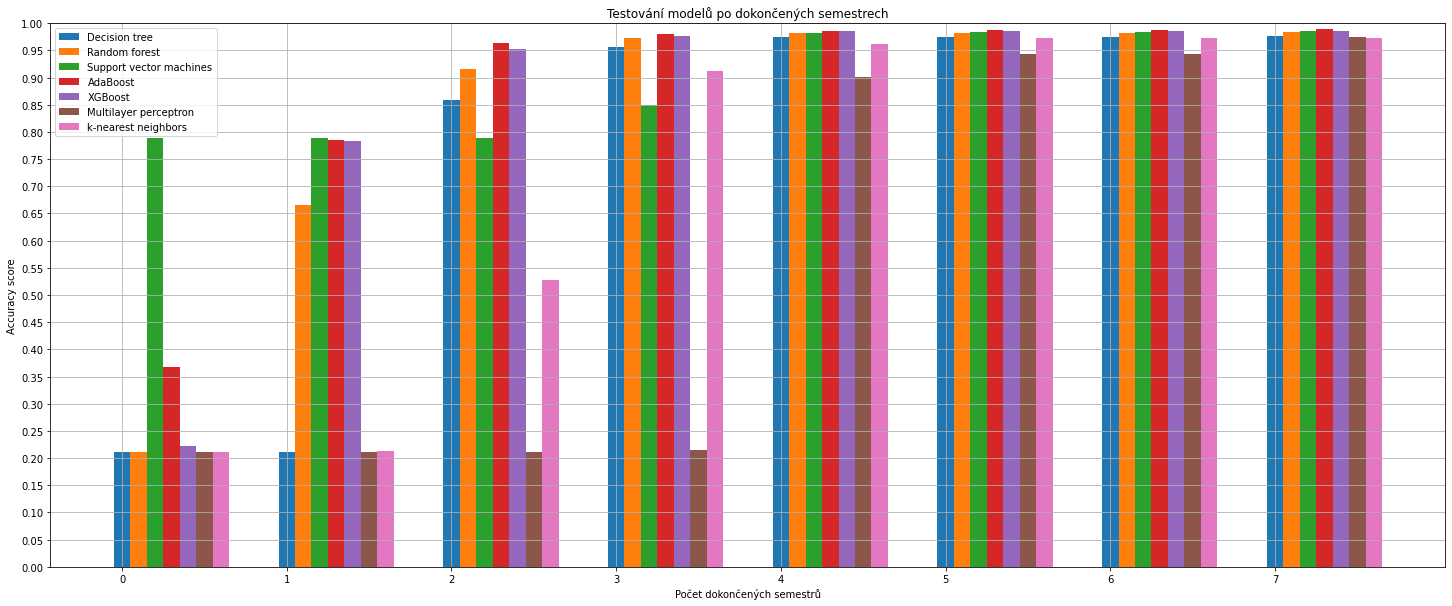

In [75]:
labels = np.array(results.index)

ydt = results['dt'].values

yrf = results['rf'].values

ysvm = results['svm'].values

yab = results['ab'].values

yxgb = results['xgb'].values

ymlp = results['mlp'].values

yknn = results['knn'].values

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , ydt, width, label='Decision tree')
rects_rf = ax.bar(x + width, yrf, width, label='Random forest')
rects_svm = ax.bar(x + width * 2, ysvm, width, label='Support vector machines')
rects_ab = ax.bar(x + width * 3, yab, width, label='AdaBoost')
rects_xgb = ax.bar(x + width * 4, yxgb, width, label='XGBoost')
rects_mlp = ax.bar(x + width * 5, ymlp, width, label='Multilayer perceptron')
rects_knn = ax.bar(x + width * 6, yknn, width, label='k-nearest neighbors')

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Počet dokončených semestrů')
ax.set_title('Testování modelů po dokončených semestrech')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()

In [76]:
results

dt     rf    svm     ab    xgb    mlp    knn
0  0.212  0.212  0.788  0.368  0.223  0.212  0.212
1  0.212  0.666  0.788  0.786  0.784  0.212  0.213
2  0.858  0.916  0.788  0.963  0.952  0.212  0.527
3  0.957  0.973  0.849  0.981  0.976  0.214  0.912
4  0.975  0.982  0.982  0.986  0.985  0.901  0.961
5  0.975  0.982  0.984  0.987  0.986  0.944  0.972
6  0.975  0.982  0.984  0.987  0.986  0.944  0.972
7  0.977  0.984  0.985   0.99  0.986  0.975  0.972

#### Po doplněni průměrem

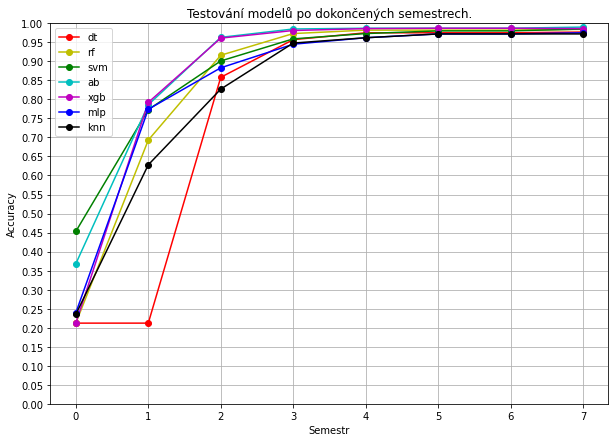

In [77]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean['dt'].index
ydt = results_mean['dt'].values

xrf = results_mean['rf'].index
yrf = results_mean['rf'].values

xsvm = results_mean['svm'].index
ysvm = results_mean['svm'].values

xab = results_mean['ab'].index
yab = results_mean['ab'].values

xxgb = results_mean['xgb'].index
yxgb = results_mean['xgb'].values

xmlp = results_mean['mlp'].index
ymlp = results_mean['mlp'].values

xknn = results_mean['knn'].index
yknn = results_mean['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [78]:
results_mean

dt     rf    svm     ab    xgb    mlp    knn
0  0.212  0.212  0.453  0.368  0.212  0.239  0.235
1  0.212  0.693  0.773  0.786  0.792  0.774  0.628
2  0.858  0.916  0.901  0.963  0.961  0.883  0.827
3  0.957  0.973  0.959  0.985  0.981  0.945  0.948
4  0.975  0.982  0.973  0.987  0.986  0.962  0.962
5  0.975  0.982   0.98  0.987  0.987  0.972  0.972
6  0.975  0.982   0.98  0.987  0.987  0.972  0.972
7  0.977  0.984  0.985   0.99  0.986  0.975  0.972

### Měřeno f1_score

In [79]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

In [80]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_mean_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

#### Po doplnění 0

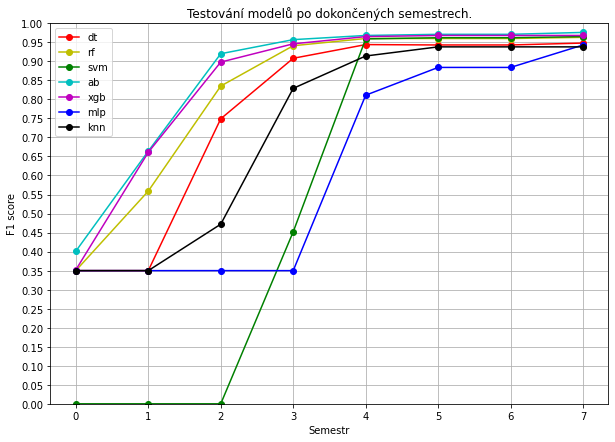

In [81]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_f1['dt'].index
ydt = results_f1['dt'].values

xrf = results_f1['rf'].index
yrf = results_f1['rf'].values

xsvm = results_f1['svm'].index
ysvm = results_f1['svm'].values

xab = results_f1['ab'].index
yab = results_f1['ab'].values

xxgb = results_f1['xgb'].index
yxgb = results_f1['xgb'].values

xmlp = results_f1['mlp'].index
ymlp = results_f1['mlp'].values

xknn = results_f1['knn'].index
yknn = results_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [82]:
results_f1

dt     rf    svm     ab    xgb    mlp    knn
0   0.35   0.35      0  0.401  0.352   0.35   0.35
1   0.35  0.559      0  0.664  0.661   0.35   0.35
2  0.749  0.835      0   0.92  0.898   0.35  0.472
3  0.908  0.941  0.452  0.957  0.946   0.35  0.829
4  0.944   0.96  0.959  0.968  0.965  0.811  0.914
5  0.943   0.96  0.962  0.971  0.968  0.884  0.938
6  0.943   0.96  0.962  0.971  0.968  0.884  0.938
7  0.948  0.963  0.965  0.976  0.968  0.943  0.938

#### Po doplněni průměrem

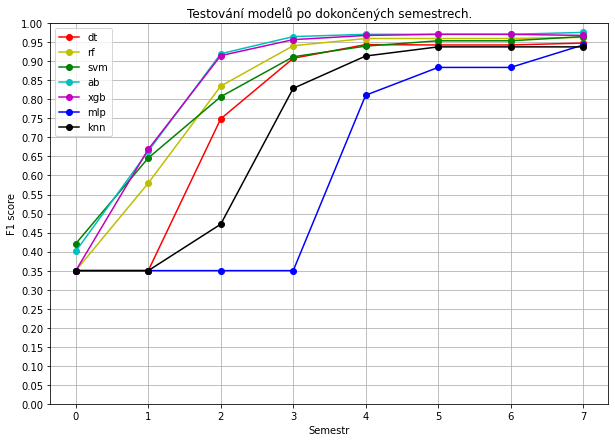

In [83]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean_f1['dt'].index
ydt = results_mean_f1['dt'].values

xrf = results_mean_f1['rf'].index
yrf = results_mean_f1['rf'].values

xsvm = results_mean_f1['svm'].index
ysvm = results_mean_f1['svm'].values

xab = results_mean_f1['ab'].index
yab = results_mean_f1['ab'].values

xxgb = results_mean_f1['xgb'].index
yxgb = results_mean_f1['xgb'].values

xmlp = results_mean_f1['mlp'].index
ymlp = results_mean_f1['mlp'].values

xknn = results_mean_f1['knn'].index
yknn = results_mean_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [84]:
results_mean_f1

dt     rf    svm     ab    xgb    mlp    knn
0   0.35   0.35  0.421  0.401   0.35   0.35   0.35
1   0.35   0.58  0.646  0.664  0.669   0.35   0.35
2  0.749  0.835  0.807   0.92  0.915   0.35  0.472
3  0.908  0.941  0.912  0.965  0.957   0.35  0.829
4  0.944   0.96   0.94  0.971  0.968  0.811  0.914
5  0.943   0.96  0.954  0.971  0.971  0.884  0.938
6  0.943   0.96  0.954  0.971  0.971  0.884  0.938
7  0.948  0.963  0.965  0.976  0.968  0.943  0.938